# Dataframes

In [46]:
# Import necessary libraries and dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import hvplot.pandas
import warnings
import panel as pn

In [47]:
# Set file path for csv file using Path from pathlib 
stocks_data= Path("../Data/Stock_Index_Raw_Data.csv")

# Read file (set "Date" column as the index and convert "Date" to datetime) 
stocks_df= pd.read_csv(stocks_data, index_col="Date", infer_datetime_format=True, parse_dates=True)

# Get data from file for tickers in unique_user_portfolio_array using ".loc" and ".isin"
unique_user_portfolio_array = ["AAPL", "AMZN", "TSLA"]

portfolio_returns = stocks_df.loc[stocks_df["Ticker"].isin(unique_user_portfolio_array)]

# Filter columns to get only the Ticker and Close Price and drop null values
portfolio_returns= portfolio_returns[["Ticker","Close_Price"]].dropna()

# Set tickers as columns
portfolio_returns= portfolio_returns.pivot_table("Close_Price","Date","Ticker")

# Calculate daily returns using "pct_change" and drop null values 
portfolio_returns = portfolio_returns.pct_change().dropna()

In [48]:
# Create portfolio variable in dataframe with weights using ".dot"
weight_array = [1/3, 1/3, 1/3]

portfolio_returns["Portfolio"] = portfolio_returns.dot(weight_array)

In [49]:
# Create a dataframe for market indicators and calculate daily returns and drop nulls 
sp_returns = stocks_df.loc[stocks_df["Ticker"]=="SPX"]
sp_returns = sp_returns[["Close_Price"]].pct_change().dropna()

ndaq_returns = stocks_df.loc[stocks_df["Ticker"]=="NDAQ"]
ndaq_returns = ndaq_returns[["Close_Price"]].pct_change().dropna()

# Rename columns to SP500 and NDAQ
sp_returns.columns=["SP500"]
ndaq_returns.columns=["NDAQ"]

# Combine dataframes
market_returns = pd.concat([sp_returns, ndaq_returns], axis="columns", join="inner")

In [50]:
# Join market_return with portfolio to calculate sharp ratio

## HERE WE NEED TO ADD BEST PERFORMING PORTFOLIOS
portfolio_market_returns = pd.concat([portfolio_returns["Portfolio"], market_returns], axis="columns", join="inner")

In [51]:
# Calculate sharp ratio
portfolio_market_sharp_ratio = (portfolio_market_returns.mean() * (252)) / (portfolio_market_returns.std() * np.sqrt(252))

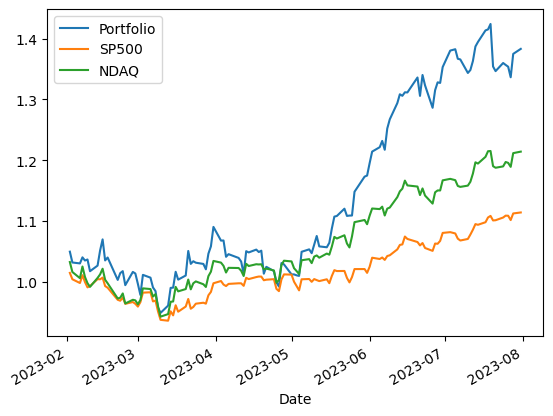

In [52]:
# For visuals 

# Calculate cumulative returns to create plot
portfolio_market_cum_return = (1 + portfolio_market_returns).cumprod()

portfolio_market_cum_return.plot()

# portfolio_cum_return = (1 + portfolio_returns).cumprod()
# portfolio_cum_return.plot()

portfolio_market_stocks_return = pd.concat([portfolio_returns, market_returns], axis="columns", join="inner")
portfolio_market_stocks_cum_return = (1 + portfolio_market_stocks_return).cumprod()

In [53]:
# correlation
correlation = portfolio_returns.corr()

In [54]:
# Sector Pie chart

portfolio_sectors = stocks_df.loc[stocks_df["Ticker"].isin(unique_user_portfolio_array)]
portfolio_sectors = portfolio_sectors[["Ticker", "Sector"]]
portfolio_sectors = portfolio_sectors.drop_duplicates()
portfolio_sectors = portfolio_sectors.groupby("Sector").count()

# DASHBOARD BLUEPRINT

In [55]:
#DASHBOARD BLUEPRINT

# Sharpe Ratio
    # User Portfolio vs S&P500 & NASDAQ - COMPLETED
    # Comparison to Top 5 previous users portfolio
# Cumulative Returns
    # Dropdown grouping Stock vs Index
    # Dropdown individual stock vs user portfolio
    # Dropdown Comparison to Top 5 previous users portfolio
# Correlation 
    # Line and scatter plot - COMPLETED
    # Heatmap - COMPLETED
# Diversity 
    # Industry Concentration Pie Chart
    # Portfolio Concentration

# Sharpe Ratio Visualization

In [56]:
# User Portfolio vs S&P500 & NASDAQ
columns = ['Portfolio','SP500','NDAQ']
portfolio_market_sharp_ratio.hvplot(kind='bar', color="green").opts(color="green",hover_color='blue')
# dashboard plot
# def get_all_sharpe_ratios():
#     all_sharpe_ratios = portfolio_market_sharp_ratio.hvplot(
#         kind='bar',
#         color="green"
#     ).opts(color="green",
#            hover_color='blue')
#     return all_sharpe_ratios

:Bars   [index]   (0)

# Cumulative Returns Visualization

In [57]:
portfolio_market_cum_return.hvplot(kind='line',color=['Blue','Orange','Red'],
                                                          title='0',
                                                          width=1000,
                                                          height=500,
                                                          legend='top_left')
# dashboard plot
# def get_all_cumul_returns():
#     all_cumul_returns = portfolio_market_cum_return.hvplot(kind='line',color=['Blue','Orange','Red'],
#                                                           title='0',
#                                                           width=1000,
#                                                           height=500,
#                                                           legend='top_left'
#                                                           )
#     return all_cumul_returns

:NdOverlay   [Variable]
   :Curve   [Date]   (value)

In [58]:
portfolio_cum_return = (1 + portfolio_returns).cumprod()
portfolio_cum_return.hvplot(kind='line',color=['Blue','Orange','Red','Green','Purple','Black'],
                                                          title='0',
                                                          width=1000,
                                                          height=500,
                                                          legend='top_left')

# dashboard plot
# def get_portfolio_cumul_returns():
#     portfolio_cumul_returns = portfolio_cum_return.hvplot(kind='line',color=['Blue','Orange','Red'],
#                                                           title='0',
#                                                           width=1000,
#                                                           height=500,
#                                                           legend='top_left'
#                                                           )
#     return portfolio_cumul_returns

:NdOverlay   [Ticker]
   :Curve   [Date]   (value)

# Correlation Visualization

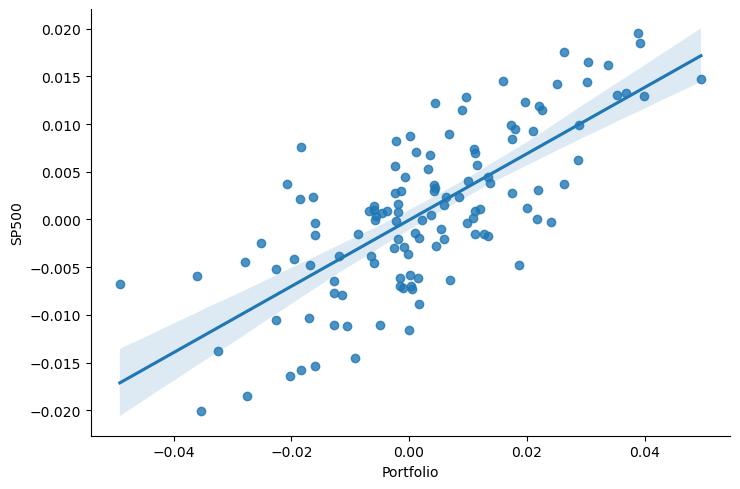

In [59]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.lmplot(x='Portfolio', y='SP500', data= portfolio_market_returns, aspect=1.5, fit_reg=True)
# dashboard plot
# def get_portfolio_sp500_corr():
#     portfolio_sp500_corr = sns.lmplot(x='Portfolio', y='SP500', data= portfolio_market_returns, aspect=1.5, fit_reg=True)
#     return portfolio_sp500_corr

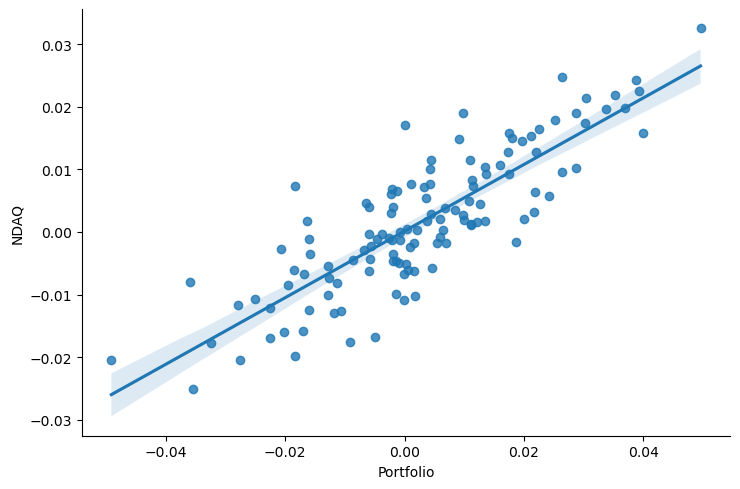

In [60]:
sns.lmplot(x='Portfolio', y='NDAQ', data= portfolio_market_returns, aspect=1.5, fit_reg=True)
# dashboard plot
# def get_portfolio_nasdaq_corr():
#     portfolio_nasdaq_corr = sns.lmplot(x='Portfolio', y='NDAQ', data= portfolio_market_returns, aspect=1.5, fit_reg=True)
#     return portfolio_nasdaq_corr

<Axes: xlabel='Ticker', ylabel='Ticker'>

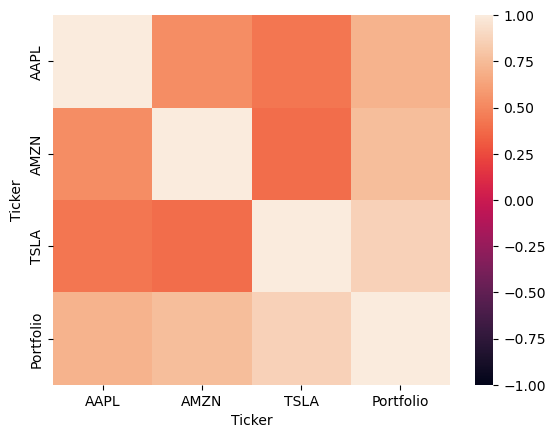

In [61]:
correlation = portfolio_returns.corr()
sns.heatmap(correlation, vmin=-1, vmax=1)
# dashboard plot
# def get_portfolio_corr():
#     correlation = portfolio_returns.corr(
#     portfolio_corr = sns.heatmap(correlation, vmin=-1, vmax=1)
#     return portfolio_corr

# Industry and Portfolio Concentration

array([<Axes: ylabel='Ticker'>], dtype=object)

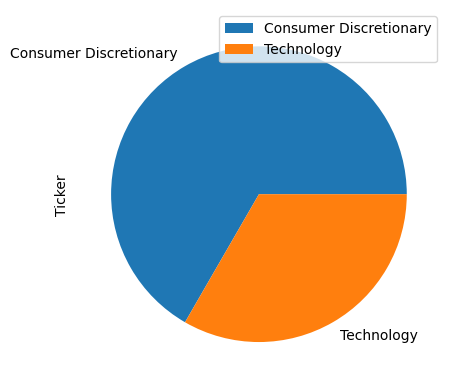

In [62]:
# Sector breakdown per the user's stock dataframe

portfolio_sectors.plot(kind="pie",subplots=True)

# Defined Visual Functions

In [63]:
# Sharpe Ratio
    # User Portfolio vs S&P500 & NASDAQ
def user_portfolio():
    stock_selection = unique_user_portfolio_array
    return stock_selection

def get_all_sharpe_ratios():
    all_sharpe_ratios = portfolio_market_sharp_ratio.hvplot(
        kind='bar',
        color="green"
    ).opts(color="green",
           hover_color='blue')
    return all_sharpe_ratios

 
    # Comparison to Top 5 previous users portfolio

    
# Cumulative Returns

def get_portfolio_cumul_returns():
    portfolio_cumul_returns = portfolio_cum_return.hvplot(kind='line',color=['Blue','Orange','Red'],
                                                          title='0',
                                                          width=1000,
                                                          height=500,
                                                          legend='top_left'
                                                          )
    return portfolio_cumul_returns

def get_all_cumul_returns():
    all_cumul_returns = portfolio_market_cum_return.hvplot(kind='line',color=['Blue','Orange','Red'],
                                                          title='0',
                                                          width=1000,
                                                          height=500,
                                                          legend='top_left'
                                                          )
    return all_cumul_returns
    # Dropdown grouping Stock vs Index

    
    # Dropdown individual stock vs user portfolio
    # Dropdown Comparison to Top 5 previous users portfolio

# Correlation 
    # Line and scatter plot
def get_portfolio_sp500_corr():
    portfolio_sp500_corr = sns.lmplot(x='Portfolio', y='SP500', data= portfolio_market_returns, aspect=1.5, fit_reg=True)
    return portfolio_sp500_corr.figure

def get_portfolio_nasdaq_corr():
    portfolio_nasdaq_corr = sns.lmplot(x='Portfolio', y='NDAQ', data= portfolio_market_returns, aspect=1.5, fit_reg=True)
    return portfolio_nasdaq_corr.figure

    # Heatmap    
def get_portfolio_corr():
    correlation = portfolio_returns.corr()
    portfolio_corr = sns.heatmap(correlation, vmin=-1, vmax=1)
    return portfolio_corr.figure
        
# Diversity 
    # Industry Concentration Pie Chart
def get_sectors():
    sectors = portfolio_sectors.plot(kind="pie",subplots=True)
    return sectors

    # Portfolio Concentration

# Created Panel colums and tabs

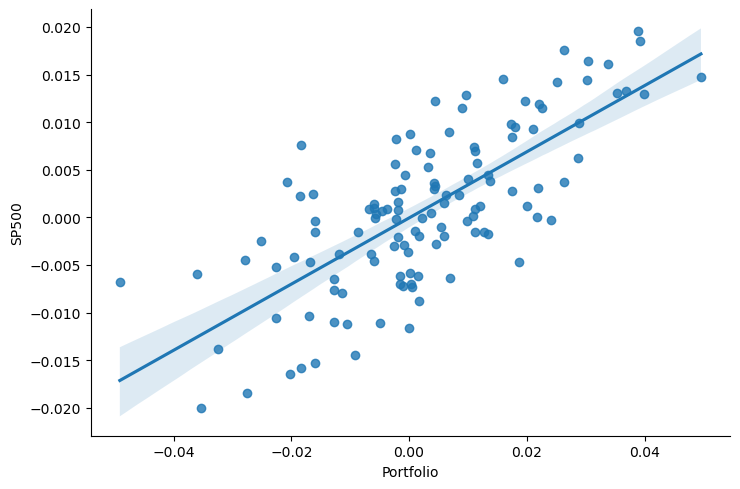

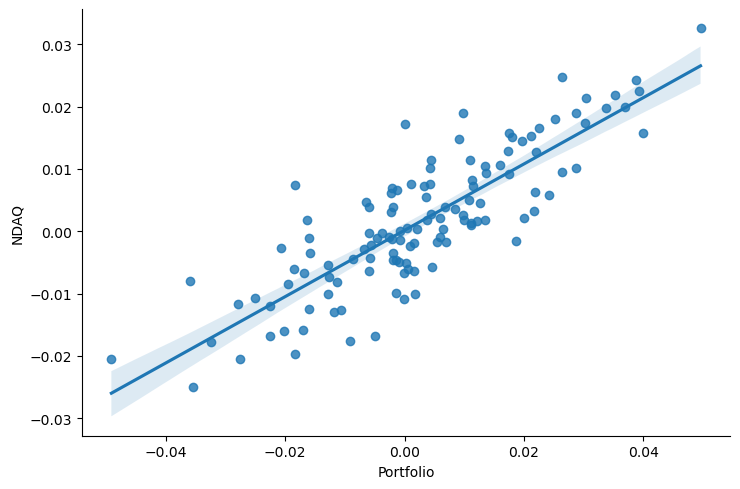

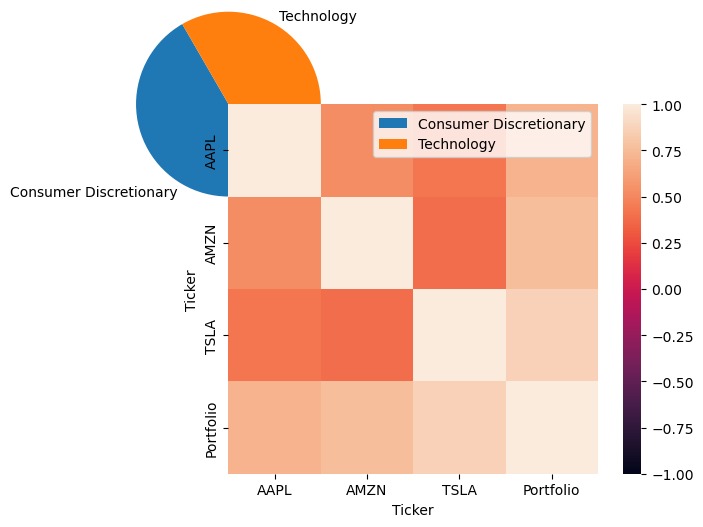

In [64]:
# Structuring panel layout on dashboard
intro_column = pn.Column(
    "## GAME OF STOCKS",
    "Navigate through the various tabs to see the results of your portfolio selection and how your portfolio compares to the S&P 500 and NASDAQ Indices.",
    "## Here are your Portfolio Selections", user_portfolio())

cumulative_returns_column = pn.Column(
    "## How did your Portfolio overall perform compared to S&P 500 and NASDAQ?",get_all_cumul_returns(),
    "## How did each stock measure to your total portfolio performance?",get_portfolio_cumul_returns())


sharpe_ratio_column = pn.Column(
    "## How does your portfolio performance compare to the S&P 500 and NASDAQ?",
    "A Sharpe ratio less than 1 is considered bad. From 1 to 1.99 is considered adequate/good, from 2 to 2.99 is considered very good, and greater than 3 is considered excellent. The higher a fund's Sharpe ratio, the better its returns have been relative to the amount of investment risk taken.",
    get_all_sharpe_ratios())


correlation_column = pn.Column(
    "## Is your Portfolio more or less correlated / aligned with the performance of the S&P 500 and NASDAQ?",get_portfolio_sp500_corr(),get_portfolio_nasdaq_corr(),
    "In investing, correlation describes how investments move relative to each other. Positively correlated assets move in the same direction, while negatively correlated assets move in opposite directions. The more correlated two assets are, the more risk they can potentially bring to your portfolio."
)


concentration_column = pn.Column(
    "What does the industry make up of your portfolio look like?", get_sectors(),
    "## How balanced is your portfolio with the current selection of stocks?", get_portfolio_corr()
)

game_of_stock_dashboard = pn.Tabs(
    ("Game of Stock Results",intro_column),
    ("Cumulative Returns",cumulative_returns_column),
    ("Sharpe Ratio", sharpe_ratio_column),
    ("Correlations", correlation_column),
    ("Portfolio Concentration",concentration_column)
)

# Launch Dashboard

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] JSON(list)
    [1] Column
        [0] Markdown(str)
        [1] HoloViews(NdOverlay, height=500, sizing_mode='fixed', width=1000)
        [2] Markdown(str)
        [3] HoloViews(NdOverlay, height=500, sizing_mode='fixed', width=1000)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] HoloViews(Bars, height=300, sizing_mode='fixed', width=700)
    [3] Column
        [0] Markdown(str)
        [1] Matplotlib(Figure, height=360, width=540)
        [2] Matplotlib(Figure, height=360, width=540)
        [3] Markdown(str)
    [4] Column
        [0] Markdown(str)
        [1] Str(ndarray)
        [2] Markdown(str)
        [3] Matplotlib(Figure, height=345, width=460)
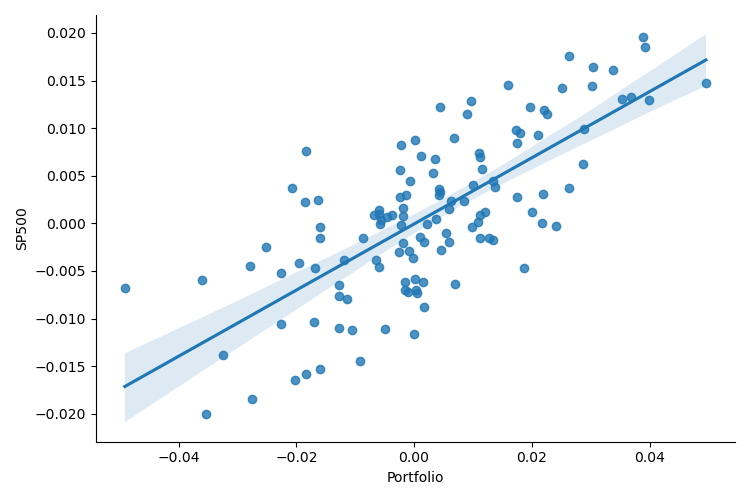
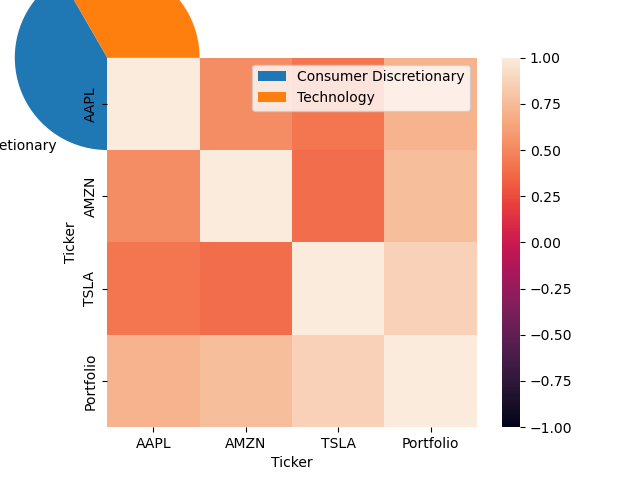
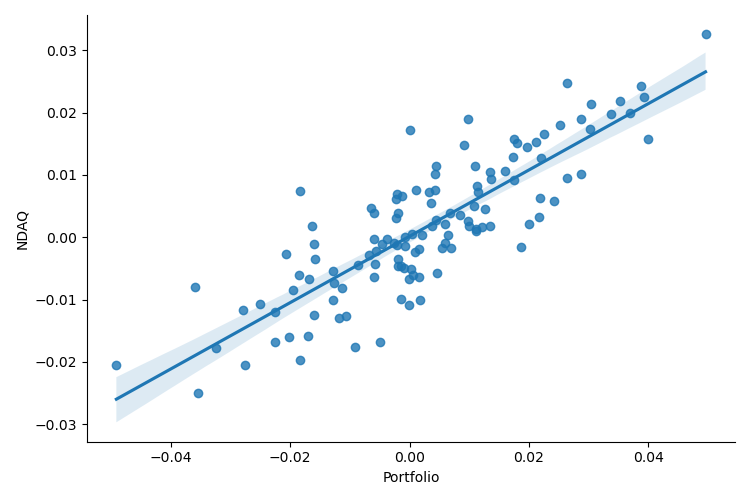

In [65]:
# Execute Panel dashboard using servable function
game_of_stock_dashboard.servable()